In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# obs = np.load('traj09-1/critic_obs.npy')
# action = np.load('traj09-1/action.npy')

# obs = np.load('traj_new1/critic_obs.npy')
# action = np.load('traj_new1/action.npy')

# obs = np.load('NewNorm25-291-2/critic_obs.npy')
# action = np.load('NewNorm25-291-2/action.npy')

# obs = np.load('Joint1/obs.npy')
# action = np.load('Joint1/action.npy')

obs = np.load('traj/obs.npy')
action = np.load('traj/action.npy')

# obs = np.load('NewNorm4-1/critic_obs.npy')
# action = np.load('NewNorm4-1/action.npy')

# obs = np.load('bullet_traj1/obs.npy')
# action = np.load('bullet_traj1/action.npy')

# obs = np.load('mask1/obs.npy')
# action = np.load('mask1/action.npy')

In [8]:
# print(obs[:,2][50:100])

IndexError: index 2 is out of bounds for axis 1 with size 2

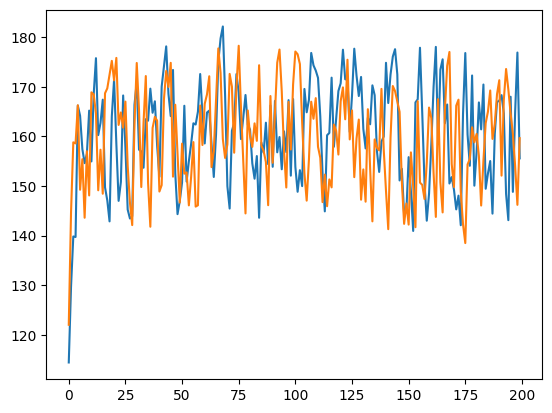

In [9]:
length = 200
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,0], label='x')
plt.plot(index, obs[:,1], label='y')
plt.plot(index, obs[:,2], label='z')
plt.legend()

# compute mse

mse = np.mean((obs[500:,0:3])**2)
print(mse)

In [ ]:
index2 = 280
index3 = np.arange(280)
plt.plot(index3, obs[0:index2,0], label='x')
plt.plot(index3, obs[0:index2,1], label='y')
plt.plot(index3, obs[0:index2,2], label='z')
plt.legend()


In [ ]:
# length = 700
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,3], label='x')
plt.plot(index, obs[:,4], label='y')
plt.plot(index, obs[:,5], label='z')
plt.legend()

In [ ]:
# length = 700
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,6], label='x')
plt.plot(index, obs[:,7], label='y')
plt.plot(index, obs[:,8], label='z')
plt.legend()

In [ ]:
plt.plot(index3, obs[:index2,-1], label='x')
plt.plot(index3, obs[:index2,-2], label='y')
plt.plot(index3, obs[:index2,-3], label='z')
plt.legend()

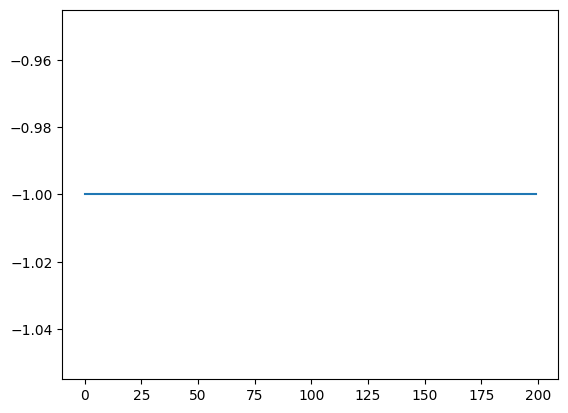

In [12]:
plt.plot(action[:,0])

In [ ]:
#旋转矩阵转欧拉角
import math
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6


# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :
    if not isRotationMatrix(R):
        u,s,v = np.linalg.svd(R.reshape(3,3))
        R = u @v
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [ ]:
rotation_matrix = obs[:, 6:15]

eulers = []

for i in range(len(rotation_matrix)):
    
    matrix = rotation_matrix[i].reshape(3, 3)
    euler = rotationMatrixToEulerAngles(matrix)
    eulers.append(euler)

eulers = np.vstack(eulers)*180/np.pi

In [ ]:
plt.plot(index, eulers[:,])

# compute the MSE

mse = np.mean((eulers[500:,])**2)
print(mse)